In [101]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt

In [103]:
df= pd.read_csv('Titanic-Dataset.csv')
df.shape

(891, 12)

In [105]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
# Simple code to check missing values
df.isnull().sum()[df.isnull().sum() > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [109]:
df['Age']= df['Age'].fillna(df['Age'].mean())

In [111]:
df.drop('Cabin', axis=1, inplace=True)

In [113]:
df.drop('Ticket', axis=1, inplace=True)

In [115]:
#df['Pclass'] = df['Pclass'].apply(str)

In [117]:
#df['Pclass'].unique()

In [119]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])

In [121]:
print(df['Sex'].unique())
print(df['Embarked'].unique())

[1 0]
[2 0 1 3]


In [123]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2


In [125]:
labels = df.pop('Survived')

In [127]:
df.drop('Name', axis=1, inplace=True)

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=42)

In [131]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
#
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [133]:
y_pred = model.predict(X_test)

In [135]:
from sklearn.metrics import accuracy_score
auc = accuracy_score(y_test, y_pred)
print(auc)

0.8156424581005587


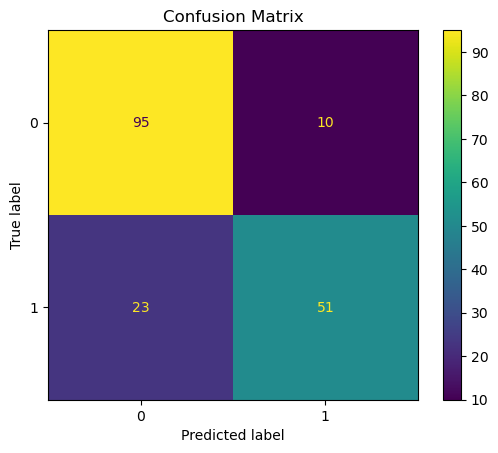

In [137]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [139]:
#import joblib
#joblib.dump(model, 'random_forest_model.pkl')

In [43]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize Random Forest model
#from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
411 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Dell\anaconda3\Lib\site-packages\s

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [44]:
# Initialize the best Random Forest model
best_model = grid_search.best_estimator_

# Fit on the training data again
best_model.fit(X_train, y_train)


RandomForestClassifier(max_features='log2', min_samples_leaf=4,
                       n_estimators=200, random_state=1)

In [95]:
# Predict with the fine-tuned model
y_pred_new = best_model.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score
print("Fine-Tuned Model Accuracy:", accuracy_score(y_test, y_pred_new))

Fine-Tuned Model Accuracy: 0.8156424581005587


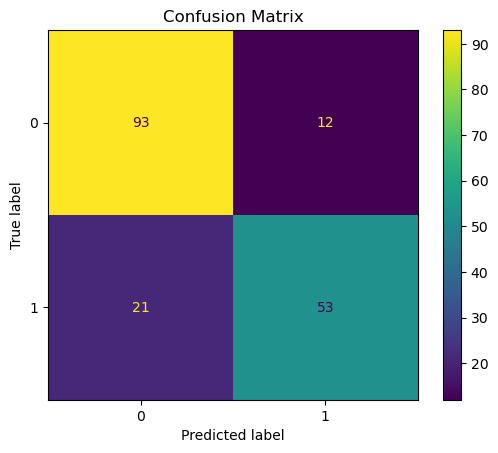

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_new)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()